<div class="alert alert-success">
Important: Much of this project is pre-code, and we simply had to fill in parts of the code they left out. It looks much different than how I would normally do a project like this.

# Sure Tomorrow

The Sure Tomorrow insurance company wants to solve several tasks with the help of Machine Learning and you are asked to evaluate that possibility.

- Task 1: Find customers who are similar to a given customer. This will help the company's agents with marketing.
- Task 2: Predict whether a new customer is likely to receive an insurance benefit. Can a prediction model do better than a dummy model?
- Task 3: Predict the number of insurance benefits a new customer is likely to receive using a linear regression model.
- Task 4: Protect clients' personal data without breaking the model from the previous task. It's necessary to develop a data transformation algorithm that would make it hard to recover personal information if the data fell into the wrong hands. This is called data masking, or data obfuscation. But the data should be protected in such a way that the quality of machine learning models doesn't suffer. You don't need to pick the best model, just prove that the algorithm works correctly.

# Data Preprocessing & Exploration

In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing
from sklearn.model_selection import train_test_split

from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C:/Users/Kayo/Downloads/insurance_us.csv')

In [3]:
# Checking general info
df.head()

,Gender,Age,Salary,Family members,Insurance benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              5000 non-null   int64  
 1   Age                 5000 non-null   float64
 2   Salary              5000 non-null   float64
 3   Family members      5000 non-null   int64  
 4   Insurance benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
df.describe()

,Gender,Age,Salary,Family members,Insurance benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


The income minimum seems suspicious, though not something impossible. There a mix between float and int, though it doesn't actually matter. The rest seems fairly error free.

## EDA

Let's quickly check whether there are certain groups of customers by looking at the pair plot.

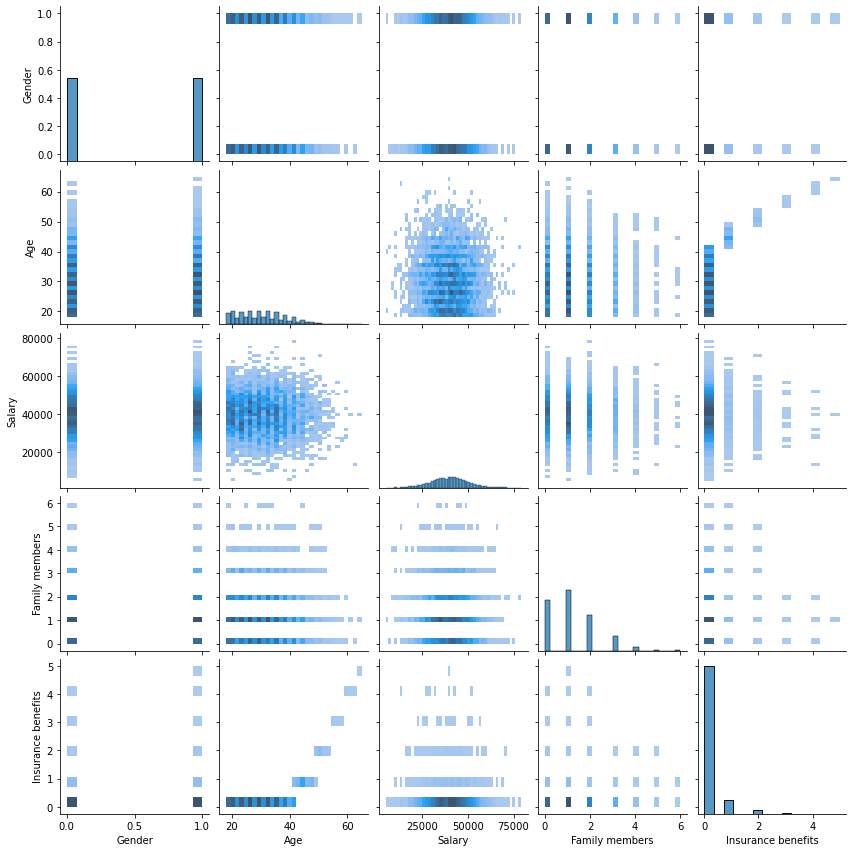

In [6]:
df_graphs = sns.pairplot(df, kind='hist')
df_graphs.fig.set_size_inches(12, 12)

Ok, it is a bit difficult to spot obvious groups (clusters) as it is difficult to combine several variables simultaneously (to analyze multivariate distributions). That's where LA and ML can be quite handy.

# Task 1. Similar Customers

In the language of ML, it is necessary to develop a procedure that returns k nearest neighbors (objects) for a given object based on the distance between the objects.

You may want to review the following lessons (chapter -> lesson)
- Distance Between Vectors -> Euclidean Distance
- Distance Between Vectors -> Manhattan Distance

To solve the task, we can try different distance metrics.

Write a function that returns k nearest neighbors for an $n^{th}$ object based on a specified distance metric. The number of received insurance benefits should not be taken into account for this task. 

You can use a ready implementation of the kNN algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) or use your own.

Test it for four combination of two cases
- Scaling
  - the data is not scaled
  - the data is scaled with the [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) scaler
- Distance Metrics
  - Euclidean
  - Manhattan

Answer these questions:
- Does the data being not scaled affect the kNN algorithm? If so, how does that appear?
- How similar are the results using the Manhattan distance metric (regardless of the scaling)?

In [7]:
def get_knn(df, n, k, metric):
    
    """
    Returns k nearest neighborsnei

    :param df: pandas DataFrame used to find similar objects within
    :param n: object no for which the nearest neighbours are looked for
    :param k: the number of the nearest neighbours to return
    :param metric: name of distance metric
    """
    
    nbrs = sklearn.neighbors.NearestNeighbors(n_neighbors=n, metric=metric)
    nbrs.fit(df[feature_names])
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

In [8]:
# Scaling our dataframe
feature_names = df.drop(['Insurance benefits'], axis=1).columns
transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [9]:
df_scaled.sample(5)

,Gender,Age,Salary,Family members,Insurance benefits
3252,1.0,0.538462,0.527848,0.166667,0
3235,0.0,0.323077,0.513924,0.000000,0
1938,0.0,0.323077,0.573418,0.333333,0
4842,0.0,0.415385,0.492405,0.000000,0
2043,0.0,0.553846,0.354430,0.333333,0


Now, let's get similar records for a given one for every combination

In [10]:
get_knn(df=df, n=6, k=3, metric='euclidean')

,Gender,Age,Salary,Family members,Insurance benefits,distance
6,1,39.0,39700.0,2,0,0.000000
3695,1,40.0,39700.0,3,0,1.414214
4248,1,38.0,39700.0,1,0,1.414214


In [11]:
get_knn(df=df, n=6, k=3, metric='manhattan')

,Gender,Age,Salary,Family members,Insurance benefits,distance
6,1,39.0,39700.0,2,0,0.0
3695,1,40.0,39700.0,3,0,2.0
4248,1,38.0,39700.0,1,0,2.0


In [12]:
get_knn(df=df_scaled, n=6, k=3, metric='euclidean')

,Gender,Age,Salary,Family members,Insurance benefits,distance
6,1.0,0.6,0.502532,0.333333,0,0.000000
1415,1.0,0.6,0.505063,0.333333,0,0.002532
108,1.0,0.6,0.507595,0.333333,0,0.005063


In [13]:
get_knn(df=df_scaled, n=6, k=3, metric='manhattan')

,Gender,Age,Salary,Family members,Insurance benefits,distance
6,1.0,0.6,0.502532,0.333333,0,0.000000
1415,1.0,0.6,0.505063,0.333333,0,0.002532
108,1.0,0.6,0.507595,0.333333,0,0.005063


Answers to the questions

**Does the data being not scaled affect the kNN algorithm? If so, how does that appear?** 

When it's not scaled it results in finding the 'nearest' values still having relatively large distances. Scaling seems to improve the function's ability to find the closest value's rows.

**How similar are the results using the Manhattan distance metric (regardless of the scaling)?** 

Using Manhattan vs Euclidean seems to result in the same outcome for this dataset.

# Task 2. Is Customer Likely to Receive Insurance Benefit?

In terms of machine learning we can look at this like a binary classification task.

With `insurance_benefits` being more than zero as the target, evaluate whether the kNN classification approach can do better than a dummy model.

Instructions:
- Build a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one. That'd be interesting to see how k may influece the evaluation metric, and whether scaling the data makes any difference. You can use a ready implemention of the kNN classification algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) or use your own.
- Build the dummy model which is just random for this case. It should return "1" with some probability. Let's test the model with four probability values: 0, the probability of paying any insurance benefit, 0.5, 1.

The probability of paying any insurance benefit can be defined as

$$
P\{\text{insurance benefit received}\}=\frac{\text{number of clients received any insurance benefit}}{\text{total number of clients}}.
$$

Split the whole data in the 70:30 proportion for the training/testing parts.

In [14]:
# calculate the target
df['insurance_benefits_received'] = (df['Insurance benefits'] > 0).astype(int)

target_train, target_test, features_train, features_test = train_test_split(
    df['insurance_benefits_received'], df.drop(['insurance_benefits_received'], axis=1), test_size=0.7, random_state=42)

In [15]:
# check for the class imbalance with value_counts()
df['insurance_benefits_received'].value_counts()

0    4436
1     564
Name: insurance_benefits_received, dtype: int64

In [16]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# if you have an issue with the following line, restart the kernel and run the notebook again
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Confusion Matrix')
    print(cm)

In [17]:
# generating output of a random model

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [18]:
# Dummy model
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'The probability: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, len(df))
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

The probability: 0.00
F1: 0.00
Confusion Matrix
[[0.8872 0.    ]
 [0.1128 0.    ]]

The probability: 0.11
F1: 0.12
Confusion Matrix
[[0.7914 0.0958]
 [0.0994 0.0134]]

The probability: 0.50
F1: 0.20
Confusion Matrix
[[0.456  0.4312]
 [0.053  0.0598]]

The probability: 1.00
F1: 0.20
Confusion Matrix
[[0.     0.8872]
 [0.     0.1128]]



In [19]:
# Proper model
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, metric='euclidean', algorithm='brute')
model.fit(features_train, target_train)

P = model.predict(features_test)

eval_classifier(target_test, P)

F1: 0.08
Confusion Matrix
[[0.884      0.00314286]
 [0.10828571 0.00457143]]


In [20]:
# Proper scaled model
df_scaled = df
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

scaled_target_train, scaled_target_test, scaled_features_train, scaled_features_test = train_test_split(
    df_scaled['insurance_benefits_received'], df_scaled.drop(['insurance_benefits_received'], axis=1), test_size=0.7, random_state=42)

model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, metric='euclidean', algorithm='brute')
model.fit(scaled_features_train, scaled_target_train)
predict = model.predict(scaled_features_test)

P = model.predict(scaled_features_test)
eval_classifier(scaled_target_test, P)

F1: 1.00
Confusion Matrix
[[0.88714286 0.        ]
 [0.         0.11285714]]


The dummy can surpass the unscaled model, though the scaled model has a much better (1.0) F1 score than the dummy or unscaled model.

# Task 3. Regression (with Linear Regression)

With `insurance_benefits` as the target, evaluate what RMSE would be for a Linear Regression model.

Build your own implementation of LR. For that, recall how the linear regression task's solution is formulated in terms of LA. Check RMSE for both the original data and the scaled one. Can you see any difference in RMSE between these two cases?

Let's denote
- $X$ — feature matrix, each row is a case, each column is a feature, the first column consists of unities
- $y$ — target (a vector)
- $\hat{y}$ — estimated tagret (a vector)
- $w$ — weight vector

The task of linear regression in the language of matrices can be formulated as

$$
y = Xw
$$

The training objective then is to find such $w$ that it would minimize the L2-distance (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

It appears that there is analytical solution for the above:

$$
w = (X^T X)^{-1} X^T y
$$

The formula above can be used to find the weights $w$ and the latter can be used to calculate predicted values

$$
\hat{y} = X_{val}w
$$

Split the whole data in the 70:30 proportion for the training/validation parts. Use the RMSE metric for the model evaluation.

In [21]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)

    def predict(self, X):
        
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        y_pred = np.dot(X2, self.weights)
        
        return y_pred

In [22]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [23]:
X = df[['Age', 'Gender', 'Salary', 'Family members']].to_numpy()
y = df['Insurance benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-0.94353901  2.32372069  0.01642727 -0.02059875 -0.07014128]
RMSE: 0.34
R2: 0.66


In [24]:
lr = MyLinearRegression()

lr.fit(scaled_features_train, scaled_target_train)
print(lr.weights)

scaled_target_test_pred = lr.predict(scaled_features_test)
eval_regressor(scaled_target_test, scaled_target_test_pred)

[-0.12072951  0.00209797  0.27613324  0.02609914  0.00180037  0.59851614]
RMSE: 0.14
R2: 0.89


The RMSE for the unscaled model is much higher than the scaled model, as well as the R2 score being higher for the scaled model. It seems that scaling is almost always better.

# Task 4. Obfuscating Data

It best to obfuscate data by multiplying the numerical features (remember, they can be seen as the matrix $X$) by an invertible matrix $P$. 

$$
X' = X \times P
$$

Try to do that and check how the features' values will look like after the transformation. By the way, the intertible property is important here so make sure that $P$ is indeed invertible.

You may want to review the 'Matrices and Matrix Operations -> Matrix Multiplication' lesson to recall the rule of matrix multiplication and its implementation with NumPy.

In [25]:
personal_info_column_list = feature_names
df_pn = df[personal_info_column_list]

X = df_pn.to_numpy()

Generating a random matrix $P$.

In [26]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

In [27]:
P.shape

(4, 4)

Checking the matrix $P$ is invertible

In [28]:
try:
    np.dot(P, np.linalg.inv(P))
except:
    print('Not invertible - generates an error.')

Can you guess the customers' ages or income after the transformation?

No

Can you recover the original data from $X'$ if you know $P$? Try to check that with calculations by moving $P$ from the right side of the formula above to the left one. The rules of matrix multiplcation are really helpful here.

In [29]:
np.dot(np.dot(X, P), np.linalg.inv(P))

array([[ 1.00000000e+00,  6.30769231e-01,  6.27848101e-01,
         1.66666667e-01],
       [-1.96826790e-17,  7.07692308e-01,  4.81012658e-01,
         1.66666667e-01],
       [ 8.19970575e-17,  4.46153846e-01,  2.65822785e-01,
        -5.81541810e-17],
       ...,
       [-3.62265212e-18,  3.07692308e-01,  4.29113924e-01,
         3.33333333e-01],
       [ 1.00000000e+00,  3.38461538e-01,  4.13924051e-01,
         5.00000000e-01],
       [ 1.00000000e+00,  4.30769231e-01,  5.13924051e-01,
         1.66666667e-01]])

Print all three cases for a few customers
- The original data
- The transformed one
- The reversed (recovered) one

In [30]:
print(P)
print()
print(np.dot(X, P))
print()
print(np.dot(np.dot(X, P), np.linalg.inv(P)))

[[0.77395605 0.43887844 0.85859792 0.69736803]
 [0.09417735 0.97562235 0.7611397  0.78606431]
 [0.12811363 0.45038594 0.37079802 0.92676499]
 [0.64386512 0.82276161 0.4434142  0.22723872]]

[[1.02110698 1.47417189 1.64540863 1.81293397]
 [0.23558372 1.04420871 0.79091362 1.03995047]
 [0.07607311 0.55500051 0.43815197 0.59706086]
 ...
 [0.2985747  0.76771224 0.54111616 0.71529994]
 [1.18079333 1.36689546 1.49140375 1.46065024]
 [0.98767628 1.22773763 1.45093787 1.55014028]]

[[ 1.00000000e+00  6.30769231e-01  6.27848101e-01  1.66666667e-01]
 [-1.96826790e-17  7.07692308e-01  4.81012658e-01  1.66666667e-01]
 [ 8.19970575e-17  4.46153846e-01  2.65822785e-01 -5.81541810e-17]
 ...
 [-3.62265212e-18  3.07692308e-01  4.29113924e-01  3.33333333e-01]
 [ 1.00000000e+00  3.38461538e-01  4.13924051e-01  5.00000000e-01]
 [ 1.00000000e+00  4.30769231e-01  5.13924051e-01  1.66666667e-01]]


You can probably see that some values are not exactly the same as they are in the original data. What might be the reason for that?

The reason may be that the numbers displayed for each element in the matrix is only a shortened form of the real value of each element. 1/3 is printed as 0.3333333333333333, but it's real value is actually 0.3 repeating infinitely, though for the purposes of calculation it is cut off at the remaining 53 numbers and rounded, and it only actually displays the remaining 16 numbers. It may be the case that the values it calculates has small numbers that add up to a larger sum once the calculations are finished and displayed, resulting in a much different number than expected whilst still being the most accurate it can be within python's limitations.

In [31]:
1/3

0.3333333333333333

## Proof That Data Obfuscation Can Work with LR

The regression task has been solved with linear regression in this project. Your next task is to prove _analytically_ that the given obfuscation method won't affect linear regression in terms of predicted values i.e. their values will remain the same. Can you believe that? Well, you don't have to, you should prove it!

So, the data is obfuscated and there is $X \times P$ instead of just $X$ now. Consequently, there are other weights $w_P$ as
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

How would $w$ and $w_P$ be linked if you simplify the formula for $w_P$ above? 

What would be predicted values with $w_P$? 

What does that mean for the quality of linear regression if you measure it with RMSE?

Check Appendix B Properties of Matrices in the end of the notebook. There are useful formulas in there!

No code is necessary in this section, only analytical explanation!

**Answer**

The formula for $w_P$ is similar to the formula for $w$, but with the addition of the $P$ variable. Without it it would be close to identical. The addition of another weight would likely change the direction of the line for the equation, which may lower RMSE by giving it another factor to consider for error.

**Analytical proof**

$$w_P = [(XP)^T XP]^{-1} (XP)^T y$$
$$w_P = [(P^TX^TX)P]^{-1} P^TX^T y$$
$$w_P = [P^TX^T]^{-1}X^{-1}P^{-1} P^TX^T y$$
$$w_P = [X^T]^{-1}X^{-1}P^{-1T}P^{-1} P^TX^T y$$
$$w_P = [X^T]^{-1}X^{-1}P^{-1} X^T y$$
$$w_P = (X^TX)^{-1}P^{-1} X^T y$$
$$w = (X^T X)^{-1} X^T y $$
$$w_P = P^{-1}w$$ 

Predicted values with $w_P$:

$$\hat{y}_P = XP w_P$$
$$\hat{y}_P = XP P^{-1}w$$
$$\hat{y}_P = Xw$$

## Test Linear Regression With Data Obfuscation

Now, let's prove Linear Regression can work computationally with the chosen obfuscation transformation.

Build a procedure or a class that runs Linear Regression optionally with the obfuscation. You can use either a ready implementation of Linear Regression from sciki-learn or your own.

Run Linear Regression for the original data and the obfuscated one, compare the predicted values and the RMSE, $R^2$ metric values. Is there any difference?

**Procedure**

- Create a square matrix $P$ of random numbers.
- Check that it is invertible. If not, repeat the first point until we get an invertible matrix.
- Implement Linear Regression with and without obfuscation
- Use $XP$ as the new feature matrix

In [32]:
rng = np.random.default_rng(seed=200)
P = rng.random(size=(X.shape[1], X.shape[1]))

P = np.linalg.inv(P)

In [33]:
# df can't be multiplied with P because of it's shape, so the now uneeded df['insurance_benefits'] will be dropped
df = df.drop(['Insurance benefits'], axis=1)

In [34]:
# Rescaling to undo previous alterations
df_scaled = df
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

scaled_target_train, scaled_target_test, scaled_features_train, scaled_features_test = train_test_split(
    df_scaled['insurance_benefits_received'], df_scaled.drop(['insurance_benefits_received'], axis=1), test_size=0.7, random_state=42)

# Redoing train/test variables to undo previous alterations
target_train, target_test, features_train, features_test = train_test_split(
    df['insurance_benefits_received'], df.drop(['insurance_benefits_received'], axis=1), test_size=0.7, random_state=42)

In [35]:
# Checking RMSE with scaled model
lr = sklearn.linear_model.LinearRegression()
scaled_features_train = np.dot(scaled_features_train, P)

lr.fit(scaled_features_train, scaled_target_train)
predict = lr.predict(scaled_features_train)

print('RMSE score:', math.sqrt(sklearn.metrics.mean_squared_error(scaled_target_train, predict)))
print('R2 score:', math.sqrt(sklearn.metrics.r2_score(scaled_target_train, predict)))

RMSE score: 0.23911840297746664
R2 score: 0.6542696972058942


In [36]:
# Checking RMSE without scaled model
kr = sklearn.linear_model.LinearRegression()
features_train = np.dot(features_train, P)

kr.fit(features_train, target_train)
predict = lr.predict(features_train)

print('RMSE score:', math.sqrt(sklearn.metrics.mean_squared_error(target_train, predict)))
print('R2 score:', math.sqrt(sklearn.metrics.r2_score(target_train, predict)))

RMSE score: 0.23911840297746664
R2 score: 0.6542696972058942


# Conclusions

The RMSE and R2 score of the obfuscated scaled model is just as good as the non-obfuscated model. The previous tasks have shown us a scaled model is almost always better than an unscaled model, and obfuscating can be done without sacrificing model quality.

# Appendices 

## Appendix A: Writing Formulas in Jupyter Notebooks

You can write formulas in your Jupyter Notebook in a markup language provided by a high-quality publishing system called $\LaTeX$ (pronounced "Lah-tech"), and they will look like formulas in textbooks.

To put a formula in a text, put the dollar sign (\\$) before and after the formula's text e.g. $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

If a formula should be in its own paragraph, put the double dollar sign (\\$\\$) before and after the formula text e.g.

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

The markup language of [LaTeX](https://en.wikipedia.org/wiki/LaTeX) is very popular among people who use formulas in their articles, books and texts. It can be complex but its basics are easy. Check this two page [cheatsheet](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) for learning how to compose the most common formulas.

## Appendix B: Properties of Matrices

Matrices have many properties in Linear Algebra. A few of them are listed here which can help with the analytical proof in this project.

<table>
<tr>
<td>Distributivity</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Non-commutativity</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Associative property of multiplication</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Multiplicative identity property</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversivity of the transpose of a product of matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>